# Chapter 5: Temporally Forced Models

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Environment-Preparation" data-toc-modified-id="Environment-Preparation-2">Environment Preparation</a></span></li><li><span><a href="#Program-5.1:-SIR-model-with-sinusoidal-forcing" data-toc-modified-id="Program-5.1:-SIR-model-with-sinusoidal-forcing-3">Program 5.1: SIR model with sinusoidal forcing</a></span><ul class="toc-item"><li><span><a href="#5.1_Oscillations" data-toc-modified-id="5.1_Oscillations-3.1">5.1_Oscillations</a></span></li><li><span><a href="#5.1_Bifurcation" data-toc-modified-id="5.1_Bifurcation-3.2">5.1_Bifurcation</a></span></li></ul></li><li><span><a href="#Program-5.2:-SIR-model-with-corrected-term-time-forcing" data-toc-modified-id="Program-5.2:-SIR-model-with-corrected-term-time-forcing-4">Program 5.2: SIR model with corrected term-time forcing</a></span><ul class="toc-item"><li><span><a href="#5.2_Oscillations" data-toc-modified-id="5.2_Oscillations-4.1">5.2_Oscillations</a></span></li><li><span><a href="#5.2_Bifurcation" data-toc-modified-id="5.2_Bifurcation-4.2">5.2_Bifurcation</a></span></li></ul></li><li><span><a href="#Program-5.3:-SIR-model-with-sinusoidal-births" data-toc-modified-id="Program-5.3:-SIR-model-with-sinusoidal-births-5">Program 5.3: SIR model with sinusoidal births</a></span><ul class="toc-item"><li><span><a href="#5.3_Oscillations" data-toc-modified-id="5.3_Oscillations-5.1">5.3_Oscillations</a></span></li><li><span><a href="#5.3_Bifurcation" data-toc-modified-id="5.3_Bifurcation-5.2">5.3_Bifurcation</a></span></li></ul></li><li><span><a href="#Program-5.4:-Rabbit-Hemorrhagic-Disease-model" data-toc-modified-id="Program-5.4:-Rabbit-Hemorrhagic-Disease-model-6">Program 5.4: Rabbit Hemorrhagic Disease model</a></span></li></ul></div>

## Introduction

Chapter 5 discusses seasonally varying parameters to act as a forcing mechanism and examine their dynamical consequences. For more details please refer back to the book (http://modelinginfectiousdiseases.org/).

## Environment Preparation

In [1]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

In [2]:
pl.style.use('seaborn-whitegrid')
pl.rcParams['font.family'] = "sans-serif"

## Program 5.1: SIR model with sinusoidal forcing

### 5.1_Oscillations 

[[5.88235294e-02 1.00000000e-04 9.41076471e-01]
 [5.88673975e-02 1.00004016e-04 9.41032598e-01]
 [5.89112431e-02 1.00027030e-04 9.40988730e-01]
 ...
 [5.39734800e-02 2.16000619e-04 9.45810519e-01]
 [5.40101547e-02 2.14589230e-04 9.45775256e-01]
 [5.40468888e-02 2.13223195e-04 9.45739888e-01]]


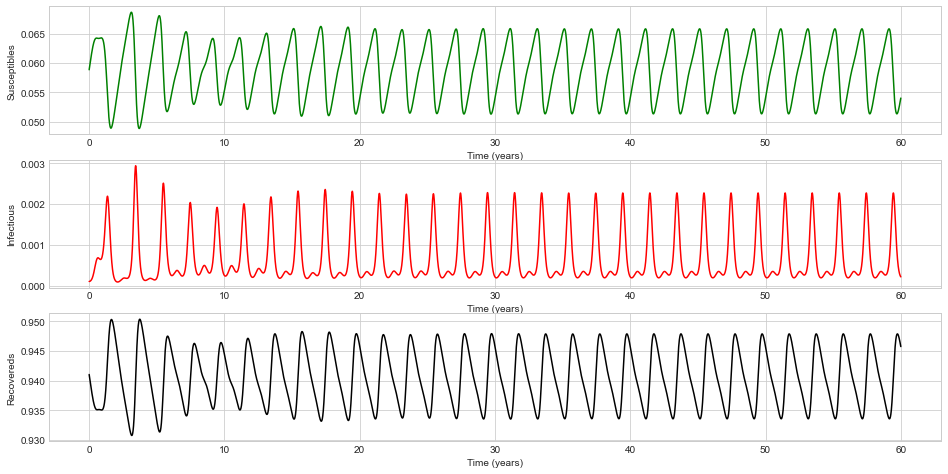

In [3]:
# Parameters
beta0=17/13.0;
beta1=([0.1]);
gamma=1/13.0;
mu=1/(50*365.0);
S0=1/17.0;
I0=1e-4;
ND=MaxTime=60*365.0;
TS=1.0


### This code can also be used to generate bifurcation diagrams, by setting
### beta1 equal to a vector of seasonality rates. The bifurcation diagram is
### constructed using extrapolated initial conditions. Try:
# (beta0,beta1,gamma,mu,S0,I0,ND)=(17/13.,np.arange(0.001,0.251,0.001),1/13.,1./(50*365),1/17.,1e-4,20*365)

INPUT=np.array((S0,I0, 1-S0-I0))

# Model Defintion
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP
	beta=beta0*(1+beta1*np.sin(2*np.pi*t/365))
	Y[0] = mu - beta*V[0]*V[1] - mu*V[0]
	Y[1] = beta*V[0]*V[1] - mu*V[1] - gamma*V[1]
	Y[2] = gamma * V[1] - mu * V[2]
	return Y   # For odeint

# Model Run
if len(beta1)==1:
	beta1=beta1[0]
	t_start = 0.0; t_end = ND; t_inc = TS
	t_range = np.arange(t_start, t_end+t_inc, t_inc)
	RES = spi.odeint(diff_eqs,INPUT,t_range)

	# Print Results
	print (RES)

	t=(np.arange(ND)/365.)
	#Ploting
	pl.figure(figsize=(16, 8))
	pl.subplot(311)
	pl.plot(t,RES[1:,0], 'g', label='S')
	pl.xlabel ('Time (years)')
	pl.ylabel ('Susceptibles')
	pl.subplot(312)
	pl.plot(t,RES[1:,1], 'r', label='I')
	pl.xlabel ('Time (years)')
	pl.ylabel ('Infectious')
	pl.subplot(313)
	pl.plot(t,1-(RES[1:,0]+RES[1:,1]), 'k', label='R')
	pl.xlabel ('Time (years)')
	pl.ylabel ('Recovereds')

else:
	pl.ion()
	if ND < 3650:
		ND = 3650
	beta2=beta1
	Bifur_I=np.zeros((len(beta2),10))
	for i in range(len(beta2)):
		beta1 = beta2[i]
		# Model Run
		t_start = 0.0; t_end = ND; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES = spi.odeint(diff_eqs,INPUT,t_range)
		INPUT=RES[-1]
		for j in range(10):
			Bifur_I[i,j]=RES[np.arange(ND)[((ND-j*365)-1)],1]

		### Producing the plot step by step but it is slow
		### Prefer to make a video as shown in spatial models
		# if i > 1:
		# 	pl.semilogy (beta2, Bifur_I, '.k')
		# 	pl.xlabel (r'Seasonality, $\beta_1$')
		# 	pl.ylabel (r'Level of Infection')
	pl.ioff()
	pl.figure(figsize=(16, 8))
	pl.semilogy (beta2, (Bifur_I), '.k')
	### if TeX commands do not work comment comment the next line
	pl.xlabel (r'Seasonality, $\beta_1$')
	pl.ylabel (r'Level of Infection')
	### if TeX commands do not work comment uncomment the next line
#	pl.xlabel ('Seasonality, beta1')
#	pl.ylabel ('Level of Infection (log_10)')


### 5.1_Bifurcation

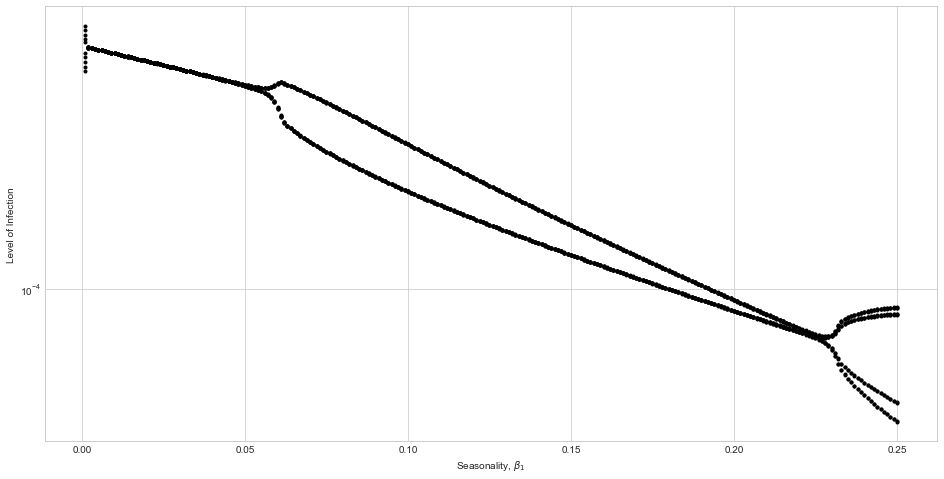

In [4]:
# Parameters
beta0=17/13.0;
beta1=([0.1]);
gamma=1/13.0;
mu=1/(50*365.0);
S0=1/17.0;
I0=1e-4;
ND=MaxTime=60*365.0;
TS=1.0


### This code can also be used to generate bifurcation diagrams, by setting
### beta1 equal to a vector of seasonality rates. The bifurcation diagram is
### constructed using extrapolated initial conditions. Try:
(beta0,beta1,gamma,mu,S0,I0,ND)=(17/13.,np.arange(0.001,0.251,0.001),1/13.,1./(50*365),1/17.,1e-4,20*365)

INPUT=np.array((S0,I0, 1-S0-I0))

# Model Defintion
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP
	beta=beta0*(1+beta1*np.sin(2*np.pi*t/365))
	Y[0] = mu - beta*V[0]*V[1] - mu*V[0]
	Y[1] = beta*V[0]*V[1] - mu*V[1] - gamma*V[1]
	Y[2] = gamma * V[1] - mu * V[2]
	return Y   # For odeint

# Model Run
if len(beta1)==1:
	beta1=beta1[0]
	t_start = 0.0; t_end = ND; t_inc = TS
	t_range = np.arange(t_start, t_end+t_inc, t_inc)
	RES = spi.odeint(diff_eqs,INPUT,t_range)

	# Print Results
	print (RES)

	t=(np.arange(ND)/365.)
	#Ploting
	pl.figure(figsize=(16, 8))
	pl.subplot(311)
	pl.plot(t,RES[1:,0], 'g', label='S')
	pl.xlabel ('Time (years)')
	pl.ylabel ('Susceptibles')
	pl.subplot(312)
	pl.plot(t,RES[1:,1], 'r', label='I')
	pl.xlabel ('Time (years)')
	pl.ylabel ('Infectious')
	pl.subplot(313)
	pl.plot(t,1-(RES[1:,0]+RES[1:,1]), 'k', label='R')
	pl.xlabel ('Time (years)')
	pl.ylabel ('Recovereds')

else:
	pl.ion()
	if ND < 3650:
		ND = 3650
	beta2=beta1
	Bifur_I=np.zeros((len(beta2),10))
	for i in range(len(beta2)):
		beta1 = beta2[i]
		# Model Run
		t_start = 0.0; t_end = ND; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES = spi.odeint(diff_eqs,INPUT,t_range)
		INPUT=RES[-1]
		for j in range(10):
			Bifur_I[i,j]=RES[np.arange(ND)[((ND-j*365)-1)],1]

		### Producing the plot step by step but it is slow
		### Prefer to make a video as shown in spatial models
		# if i > 1:
		# 	pl.semilogy (beta2, Bifur_I, '.k')
		# 	pl.xlabel (r'Seasonality, $\beta_1$')
		# 	pl.ylabel (r'Level of Infection')
	pl.ioff()
	pl.figure(figsize=(16, 8))
	pl.semilogy (beta2, (Bifur_I), '.k')
	### if TeX commands do not work comment comment the next line
	pl.xlabel (r'Seasonality, $\beta_1$')
	pl.ylabel (r'Level of Infection')
	### if TeX commands do not work comment uncomment the next line
#	pl.xlabel ('Seasonality, beta1')
#	pl.ylabel ('Level of Infection (log_10)')


## Program 5.2: SIR model with corrected term-time forcing

### 5.2_Oscillations

1.1578112609040443 0.25
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.88235294e-02 1.00000000e-04 9.41076471e-01]
 [5.88698186e-02 9.76713186e-05 9.41032510e-01]
 ...
 [6.03392014e-02 5.87773487e-04 9.39073025e-01]
 [6.03588433e-02 5.74873348e-04 9.39066283e-01]
 [6.03791721e-02 5.62266403e-04 9.39058562e-01]]


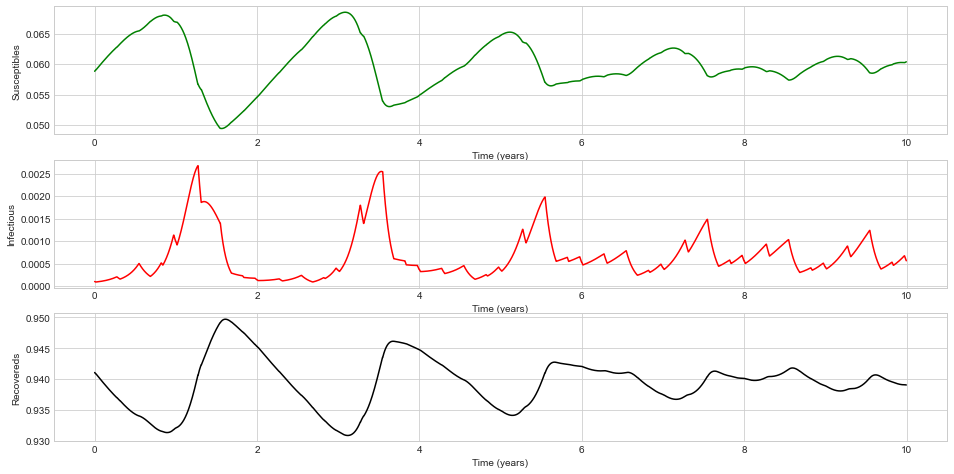

In [5]:
# Parameters
Beta0=17/13.;
Beta1=([0.25]);
gamma=1/13.0;
mu=1/(50*365.0);
S0=1/17.;
I0=1e-4;
Years=10
MaxTime=365.
TS=1.0

### This code can also be used to generate bifurcation diagrams, by setting
### beta1 equal to a vector of seasonality rates. The bifurcation diagram is
### constructed using extrapolated initial conditions. Try:
# (Beta0,Beta1,gamma,mu,S0,I0,Years, MaxTime)=(17/13.,np.arange(0.00,0.301,0.001),1/13.,1./(50*365),1/17.,1e-4,20,365)

ND=Years*MaxTime
INPUT=np.array((S0,I0, 1-S0-I0))

# Model Definition
def term(t):
	t=np.mod(t,365)
	if t < 6 or t > 100 and t < 115 or t > 200 and t < 251 or t > 300 and t < 307 or t > 356 and t <= 365:
		Term = -1
	else:
		Term = 1
	return Term

def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP
	beta=beta0-beta1
	Y[0] = mu - beta*V[0]*V[1] - mu*V[0]
	Y[1] = beta*V[0]*V[1] - mu*V[1] - gamma*V[1]
	Y[2] = gamma * V[1] - mu * V[2]
	return Y   # For odeint

def diff_eqs2(INP,t):
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP
	beta=beta0+beta1
	Y[0] = mu - beta*V[0]*V[1] - mu*V[0]
	Y[1] = beta*V[0]*V[1] - mu*V[1] - gamma*V[1]
	Y[2] = gamma * V[1] - mu * V[2]
	return Y   # For odeint

def FORCED_ODE(diff_eqs,INPUT, beta0, beta1):
	'''Calculates the differential rates used in the integration.'''
	RES=np.zeros((3))
	for Year in range(Years):
		t_start =  Year*365.+1; t_end = Year*365.+6.; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES2=spi.odeint(diff_eqs,INPUT,t_range)
		RES=np.vstack((RES,RES2))
		INPUT=RES2[-1]
		t_start =  Year*365.+7; t_end = Year*365.+100; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES2=spi.odeint(diff_eqs2,INPUT,t_range)
		RES=np.vstack((RES,RES2))
		INPUT=RES2[-1]
		t_start = Year*365.+101; t_end = Year*365.+115; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES2=spi.odeint(diff_eqs,INPUT,t_range)
		RES=np.vstack((RES,RES2))
		INPUT=RES2[-1]
		t_start = Year*365.+116; t_end = Year*365.+200; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES2=spi.odeint(diff_eqs2,INPUT,t_range)
		RES=np.vstack((RES,RES2))
		INPUT=RES2[-1]
		t_start = Year*365.+201; t_end = Year*365.+251; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES2=spi.odeint(diff_eqs,INPUT,t_range)
		RES=np.vstack((RES,RES2))
		INPUT=RES2[-1]
		t_start = Year*365.+252; t_end = Year*365.+300; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES2=spi.odeint(diff_eqs2,INPUT,t_range)
		RES=np.vstack((RES,RES2))
		INPUT=RES2[-1]
		t_start = Year*365.+301; t_end = Year*365.+307; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES2=spi.odeint(diff_eqs,INPUT,t_range)
		RES=np.vstack((RES,RES2))
		INPUT=RES2[-1]
		t_start = Year*365.+308; t_end = Year*365.+356; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES2=spi.odeint(diff_eqs2,INPUT,t_range)
		RES=np.vstack((RES,RES2))
		INPUT=RES2[-1]
		t_start = Year*365.+357; t_end = Year*365.+365; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES2=spi.odeint(diff_eqs,INPUT,t_range)
		RES=np.vstack((RES,RES2))
		INPUT=RES2[-1]
	INPUT = RES[-1]
	return RES

# Model Run
if len(Beta1)==1:
	beta1=Beta1[0]

	### Calculate Average Effect of Forcing and Correct for it.
	Ave=0;
	for t in np.arange(1,366):
		Ave+=(1+beta1*term(t+0.5))
	beta0=Beta0/(Ave/365)
	print (beta0, beta1)
	t_start = 0.0; t_end = ND; t_inc = TS
	t_range = np.arange(t_start, t_end+t_inc, t_inc)
	RES = FORCED_ODE(diff_eqs,INPUT, beta0, beta1)

	print (RES)

	t=(np.arange(ND)/365.)
	#Ploting
	pl.figure(figsize=(16, 8))
	pl.subplot(311)
	pl.plot(t,RES[1:,0], 'g', label='S')
	pl.xlabel ('Time (years)')
	pl.ylabel ('Susceptibles')
	pl.subplot(312)
	pl.plot(t,RES[1:,1], 'r', label='I')
	pl.xlabel ('Time (years)')
	pl.ylabel ('Infectious')
	pl.subplot(313)
	pl.plot(t,1-(RES[1:,0]+RES[1:,1]), 'k', label='R')
	pl.xlabel ('Time (years)')
	pl.ylabel ('Recovereds')

else:
	if ND < 3650:
		ND = 3650

	Bifur_I=np.zeros((len(Beta1),10))

	for i in range(len(Beta1)):
		beta1 = Beta1[i]
		### Calculate Average Effect of Forcing and Correct for it.
		Ave=0;
		for t in np.arange(1,366):
			Ave+=(1+beta1*term(t+0.5))
		beta0=Beta0/(Ave/365)

		t_start = 0.0; t_end = ND; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES = FORCED_ODE(diff_eqs,INPUT,beta0, beta1)
		INPUT=RES[-1]


		for j in range(10):
			Bifur_I[i,j]=RES[np.arange(ND)[((ND-j*365)-1)],1]

	pl.figure(figsize=(16, 8))
	pl.plot (Beta1, np.log10(Bifur_I), '.k')
	### if TeX commands do not work comment the next line
	pl.xlabel (r'Seasonality, $\beta_1$')
	pl.ylabel (r'Level of Infection $(log_{10})$')
	### if TeX commands do not work uncomment the next line
#	pl.xlabel ('Seasonality, beta1')
#	pl.ylabel ('Level of Infection (log_10)')

### 5.2_Bifurcation

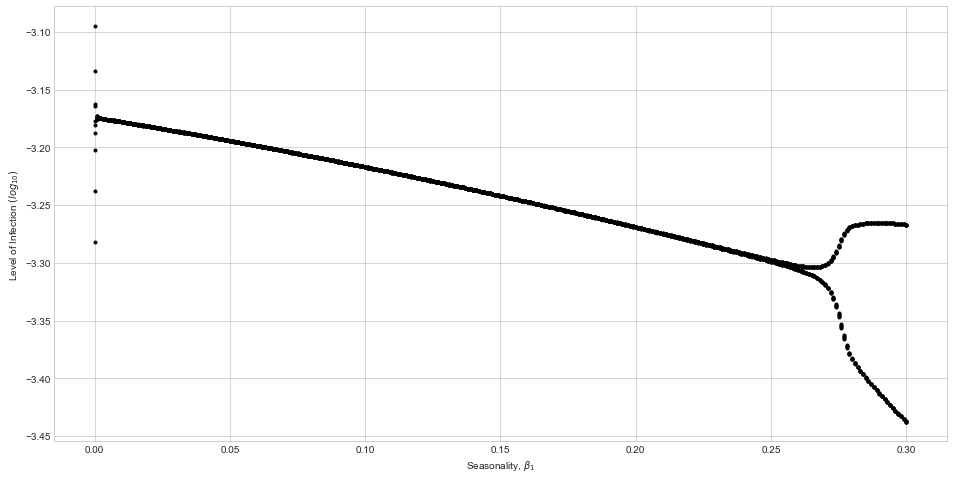

In [6]:
# Parameters
Beta0=17/13.;
Beta1=([0.25]);
gamma=1/13.0;
mu=1/(50*365.0);
S0=1/17.;
I0=1e-4;
Years=10
MaxTime=365.
TS=1.0

### This code can also be used to generate bifurcation diagrams, by setting
### beta1 equal to a vector of seasonality rates. The bifurcation diagram is
### constructed using extrapolated initial conditions. Try:
(Beta0,Beta1,gamma,mu,S0,I0,Years, MaxTime)=(17/13.,np.arange(0.00,0.301,0.001),1/13.,1./(50*365),1/17.,1e-4,20,365)

ND=Years*MaxTime
INPUT=np.array((S0,I0, 1-S0-I0))

# Model Definition
def term(t):
	t=np.mod(t,365)
	if t < 6 or t > 100 and t < 115 or t > 200 and t < 251 or t > 300 and t < 307 or t > 356 and t <= 365:
		Term = -1
	else:
		Term = 1
	return Term

def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP
	beta=beta0-beta1
	Y[0] = mu - beta*V[0]*V[1] - mu*V[0]
	Y[1] = beta*V[0]*V[1] - mu*V[1] - gamma*V[1]
	Y[2] = gamma * V[1] - mu * V[2]
	return Y   # For odeint

def diff_eqs2(INP,t):
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP
	beta=beta0+beta1
	Y[0] = mu - beta*V[0]*V[1] - mu*V[0]
	Y[1] = beta*V[0]*V[1] - mu*V[1] - gamma*V[1]
	Y[2] = gamma * V[1] - mu * V[2]
	return Y   # For odeint

def FORCED_ODE(diff_eqs,INPUT, beta0, beta1):
	'''Calculates the differential rates used in the integration.'''
	RES=np.zeros((3))
	for Year in range(Years):
		t_start =  Year*365.+1; t_end = Year*365.+6.; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES2=spi.odeint(diff_eqs,INPUT,t_range)
		RES=np.vstack((RES,RES2))
		INPUT=RES2[-1]
		t_start =  Year*365.+7; t_end = Year*365.+100; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES2=spi.odeint(diff_eqs2,INPUT,t_range)
		RES=np.vstack((RES,RES2))
		INPUT=RES2[-1]
		t_start = Year*365.+101; t_end = Year*365.+115; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES2=spi.odeint(diff_eqs,INPUT,t_range)
		RES=np.vstack((RES,RES2))
		INPUT=RES2[-1]
		t_start = Year*365.+116; t_end = Year*365.+200; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES2=spi.odeint(diff_eqs2,INPUT,t_range)
		RES=np.vstack((RES,RES2))
		INPUT=RES2[-1]
		t_start = Year*365.+201; t_end = Year*365.+251; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES2=spi.odeint(diff_eqs,INPUT,t_range)
		RES=np.vstack((RES,RES2))
		INPUT=RES2[-1]
		t_start = Year*365.+252; t_end = Year*365.+300; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES2=spi.odeint(diff_eqs2,INPUT,t_range)
		RES=np.vstack((RES,RES2))
		INPUT=RES2[-1]
		t_start = Year*365.+301; t_end = Year*365.+307; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES2=spi.odeint(diff_eqs,INPUT,t_range)
		RES=np.vstack((RES,RES2))
		INPUT=RES2[-1]
		t_start = Year*365.+308; t_end = Year*365.+356; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES2=spi.odeint(diff_eqs2,INPUT,t_range)
		RES=np.vstack((RES,RES2))
		INPUT=RES2[-1]
		t_start = Year*365.+357; t_end = Year*365.+365; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES2=spi.odeint(diff_eqs,INPUT,t_range)
		RES=np.vstack((RES,RES2))
		INPUT=RES2[-1]
	INPUT = RES[-1]
	return RES

# Model Run
if len(Beta1)==1:
	beta1=Beta1[0]

	### Calculate Average Effect of Forcing and Correct for it.
	Ave=0;
	for t in np.arange(1,366):
		Ave+=(1+beta1*term(t+0.5))
	beta0=Beta0/(Ave/365)
	print (beta0, beta1)
	t_start = 0.0; t_end = ND; t_inc = TS
	t_range = np.arange(t_start, t_end+t_inc, t_inc)
	RES = FORCED_ODE(diff_eqs,INPUT, beta0, beta1)

	print (RES)

	t=(np.arange(ND)/365.)
	#Ploting
	pl.figure(figsize=(16, 8))
	pl.subplot(311)
	pl.plot(t,RES[1:,0], 'g', label='S')
	pl.xlabel ('Time (years)')
	pl.ylabel ('Susceptibles')
	pl.subplot(312)
	pl.plot(t,RES[1:,1], 'r', label='I')
	pl.xlabel ('Time (years)')
	pl.ylabel ('Infectious')
	pl.subplot(313)
	pl.plot(t,1-(RES[1:,0]+RES[1:,1]), 'k', label='R')
	pl.xlabel ('Time (years)')
	pl.ylabel ('Recovereds')

else:
	if ND < 3650:
		ND = 3650

	Bifur_I=np.zeros((len(Beta1),10))

	for i in range(len(Beta1)):
		beta1 = Beta1[i]
		### Calculate Average Effect of Forcing and Correct for it.
		Ave=0;
		for t in np.arange(1,366):
			Ave+=(1+beta1*term(t+0.5))
		beta0=Beta0/(Ave/365)

		t_start = 0.0; t_end = ND; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES = FORCED_ODE(diff_eqs,INPUT,beta0, beta1)
		INPUT=RES[-1]


		for j in range(10):
			Bifur_I[i,j]=RES[np.arange(ND)[((ND-j*365)-1)],1]

	pl.figure(figsize=(16, 8))
	pl.plot (Beta1, np.log10(Bifur_I), '.k')
	### if TeX commands do not work comment the next line
	pl.xlabel (r'Seasonality, $\beta_1$')
	pl.ylabel (r'Level of Infection $(log_{10})$')
	### if TeX commands do not work uncomment the next line
#	pl.xlabel ('Seasonality, beta1')
#	pl.ylabel ('Level of Infection (log_10)')

## Program 5.3: SIR model with sinusoidal births

### 5.3_Oscillations

[[5.88235294e-02 1.00000000e-04 9.41076471e-01]
 [5.88675223e-02 9.99973986e-05 9.41032598e-01]
 [5.89117428e-02 1.00000565e-04 9.40988728e-01]
 ...
 [5.78397538e-02 6.67043726e-04 9.40937369e-01]
 [5.78406063e-02 6.66150007e-04 9.40937088e-01]
 [5.78417610e-02 6.65258353e-04 9.40936737e-01]]


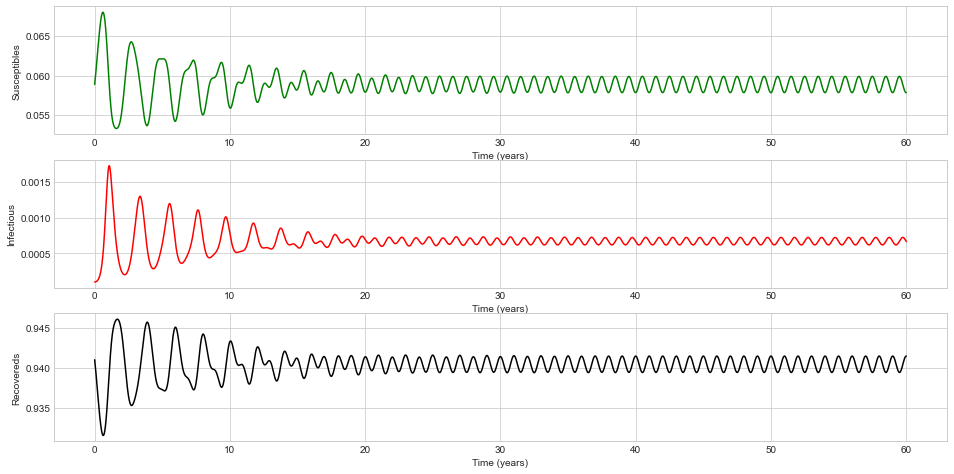

In [7]:
# Parameters
beta=17/13.
gamma=1/13.0
alpha0=1/(50*365.0)
alpha1=([0.25])
S0=1/17.
I0=1e-4
ND=MaxTime=60*365
TS=1.0


### This code can also be used to generate bifurcation diagrams, by setting
### beta1 equal to a vector of seasonality rates. The bifurcation diagram is
### constructed using extrapolated initial conditions. Try:
# (beta,gamma,alpha0, alpha1,S0,I0,ND)=(17/13.,1/13., 1./(50*365), np.arange(0.00,1.0,0.01),1/17., 1e-4, 20*365)

INPUT=np.array((S0,I0, 1-S0-I0))

# Model Definition
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP
	t=np.mod(t,365.)
	alpha=alpha0*(1+alpha1*np.sin(2*np.pi*t/365))
	mu=alpha0
	Y[0] = alpha - beta*V[0]*V[1] - mu*V[0]
	Y[1] = beta*V[0]*V[1] - mu*V[1] - gamma*V[1]
	Y[2] = gamma * V[1] - mu * V[2]
	return Y   # For odeint

# Model Run
if len(alpha1)==1:
	alpha1=alpha1[0]
	t_start = 0.0; t_end = ND; t_inc = TS
	t_range = np.arange(t_start, t_end+t_inc, t_inc)
	RES = spi.odeint(diff_eqs,INPUT,t_range)

	print (RES)

	t=(np.arange(ND)/365.)
	#Ploting
	pl.figure(figsize=(16, 8))
	pl.subplot(311)
	pl.plot(t,RES[1:,0], 'g', label='S')
	pl.xlabel ('Time (years)')
	pl.ylabel ('Susceptibles')
	pl.subplot(312)
	pl.plot(t,RES[1:,1], 'r', label='I')
	pl.xlabel ('Time (years)')
	pl.ylabel ('Infectious')
	pl.subplot(313)
	pl.plot(t,1-(RES[1:,0]+RES[1:,1]), 'k', label='R')
	pl.xlabel ('Time (years)')
	pl.ylabel ('Recovereds')

else:
	if ND < 3650:
		ND = 3650
	alpha2=alpha1
	Bifur_I=np.zeros((len(alpha2),10))
	for i in range(len(alpha2)):
		alpha1 = alpha2[i]

		t_start = 0.0; t_end = ND; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES = spi.odeint(diff_eqs,INPUT,t_range)
		INPUT=RES[-1]

		for j in range(10):
			Bifur_I[i,j]=RES[np.arange(ND)[((ND-j*365)-1)],1]

	### Plotting
	pl.figure(figsize=(16, 8))
	pl.plot (alpha2, np.log10(Bifur_I), '.k')
	### if TeX commands do not work comment comment the next line
	pl.xlabel (r'Seasonality, $\alpha_1$')
	pl.ylabel (r'Level of Infection $(log_{10})$')
	### if TeX commands do not work comment uncomment the next line
#	pl.xlabel ('Seasonality, beta1')
#	pl.ylabel ('Level of Infection (log_10)')

### 5.3_Bifurcation

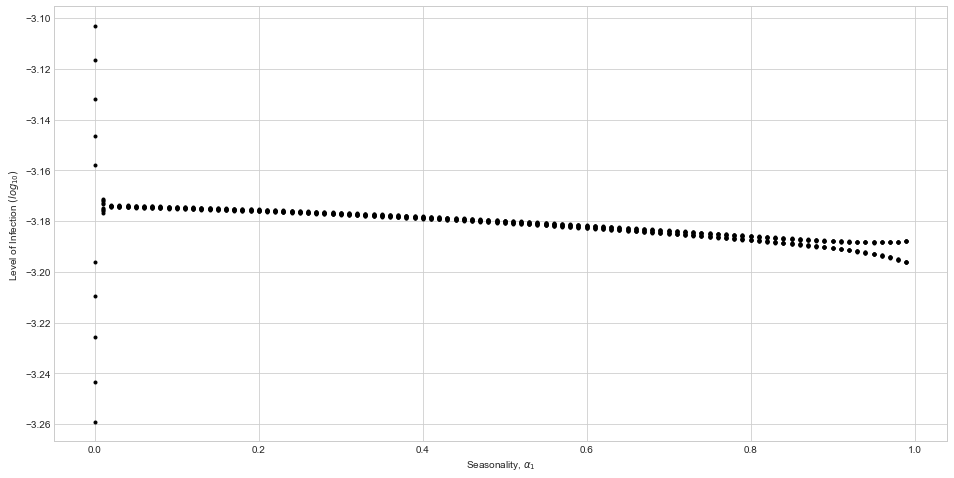

In [8]:
# Parameters
beta=17/13.
gamma=1/13.0
alpha0=1/(50*365.0)
alpha1=([0.25])
S0=1/17.
I0=1e-4
ND=MaxTime=60*365
TS=1.0


### This code can also be used to generate bifurcation diagrams, by setting
### beta1 equal to a vector of seasonality rates. The bifurcation diagram is
### constructed using extrapolated initial conditions. Try:
(beta,gamma,alpha0, alpha1,S0,I0,ND)=(17/13.,1/13., 1./(50*365), np.arange(0.00,1.0,0.01),1/17., 1e-4, 20*365)

INPUT=np.array((S0,I0, 1-S0-I0))

# Model Definition
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP
	t=np.mod(t,365.)
	alpha=alpha0*(1+alpha1*np.sin(2*np.pi*t/365))
	mu=alpha0
	Y[0] = alpha - beta*V[0]*V[1] - mu*V[0]
	Y[1] = beta*V[0]*V[1] - mu*V[1] - gamma*V[1]
	Y[2] = gamma * V[1] - mu * V[2]
	return Y   # For odeint

# Model Run
if len(alpha1)==1:
	alpha1=alpha1[0]
	t_start = 0.0; t_end = ND; t_inc = TS
	t_range = np.arange(t_start, t_end+t_inc, t_inc)
	RES = spi.odeint(diff_eqs,INPUT,t_range)

	print (RES)

	t=(np.arange(ND)/365.)
	#Ploting
	pl.figure(figsize=(16, 8))
	pl.subplot(311)
	pl.plot(t,RES[1:,0], 'g', label='S')
	pl.xlabel ('Time (years)')
	pl.ylabel ('Susceptibles')
	pl.subplot(312)
	pl.plot(t,RES[1:,1], 'r', label='I')
	pl.xlabel ('Time (years)')
	pl.ylabel ('Infectious')
	pl.subplot(313)
	pl.plot(t,1-(RES[1:,0]+RES[1:,1]), 'k', label='R')
	pl.xlabel ('Time (years)')
	pl.ylabel ('Recovereds')

else:
	if ND < 3650:
		ND = 3650
	alpha2=alpha1
	Bifur_I=np.zeros((len(alpha2),10))
	for i in range(len(alpha2)):
		alpha1 = alpha2[i]

		t_start = 0.0; t_end = ND; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES = spi.odeint(diff_eqs,INPUT,t_range)
		INPUT=RES[-1]

		for j in range(10):
			Bifur_I[i,j]=RES[np.arange(ND)[((ND-j*365)-1)],1]

	### Plotting
	pl.figure(figsize=(16, 8))
	pl.plot (alpha2, np.log10(Bifur_I), '.k')
	### if TeX commands do not work comment comment the next line
	pl.xlabel (r'Seasonality, $\alpha_1$')
	pl.ylabel (r'Level of Infection $(log_{10})$')
	### if TeX commands do not work comment uncomment the next line
#	pl.xlabel ('Seasonality, beta1')
#	pl.ylabel ('Level of Infection (log_10)')

## Program 5.4: Rabbit Hemorrhagic Disease model

[[0.5        0.01       0.6       ]
 [0.50238154 0.00960256 0.60132694]
 [0.50493421 0.00924977 0.60286688]
 ...
 [0.54879308 0.01425874 0.59315791]
 [0.5477956  0.0142847  0.59224007]
 [0.54679784 0.01431    0.5913214 ]]


Text(0, 0.5, 'Recovereds')

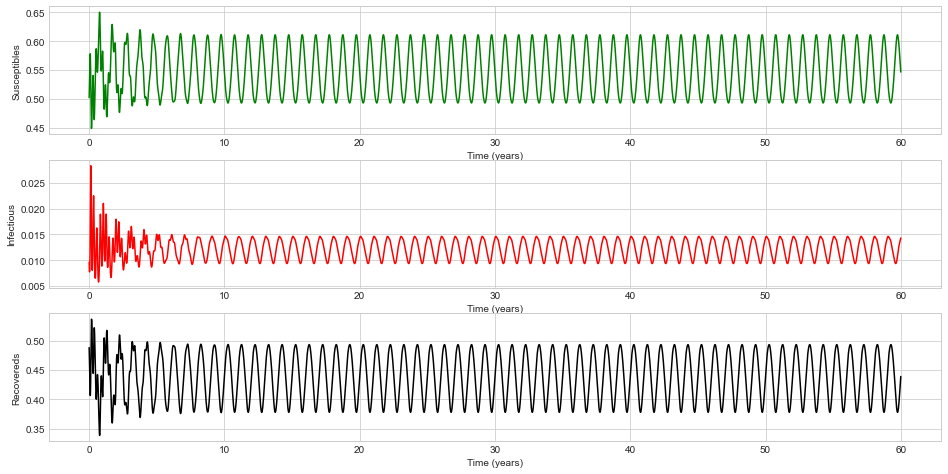

In [9]:
# Parameters
beta0=0.936;
beta1=0.1;
gamma=0.025;
alpha0=0.02;
alpha1=0.1;
mu=0.01;
m=0.475;
K=10000;

X0=0.5;
Y0=0.01;
N0=0.6;
Years = 60
ND=MaxTime=Years*365;
TS=1.0;

INPUT=np.array((X0, Y0, N0))

# Model Definition
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP
	t=np.mod(t,365)
	alpha = alpha0*(1+alpha1*np.sin(2*np.pi*t/365))
	beta = beta0*(1+beta1*np.sin(2*np.pi*t/365))
	Y[0] = alpha * V[2]- beta*V[0]*V[1] - (mu+V[2]/K) * V[0] # dX/dt
	Y[1] = beta*V[0]*V[1] - (mu + m + gamma + V[2]/K) * V[1] # dY/dt
	Y[2] = (alpha - mu - V[2]/K) * V[2] - m * V[1]
	return Y   # For odeint

# Model Run
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

# Print Results
print (RES)

t=(np.arange(ND)/365.)
#Ploting
pl.figure(figsize=(16, 8))
pl.subplot(311)
pl.plot(t,RES[1:,0], 'g', label='S')
pl.xlabel ('Time (years)')
pl.ylabel ('Susceptibles')
pl.subplot(312)
pl.plot(t,RES[1:,1], 'r', label='I')
pl.xlabel ('Time (years)')
pl.ylabel ('Infectious')
pl.subplot(313)
pl.plot(t,1-(RES[1:,0]+RES[1:,1]), 'k', label='R')
pl.xlabel ('Time (years)')
pl.ylabel ('Recovereds')